# Dataset for Classification model and it's relevancy

For classification model I have got the dataset on kaggle this is the url or the dataset https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset .

### The Relevance to the problem statement
 This dataset is relevant for predicting whether an employee is likely to withfunds from an accessible pot within 12 months, since it provides critical information about employee behavior, which can or influences financial decisions. 

 ##### The following columns are few of them that make this dataset to be relevent tthe problem statement
Monthly Income : Employee's financial behavior including the likelihood of withdrawing funds, correlate with their income level.This means those employees with lower monthly income might more inclide to access their savings if they encounter finance difficulties.

Work- Life Balance : Employees with poor work life balance might experience financial stress, which can lead them to withdraw from their savings

Job Role : Roles in the companies in South Africa are not equal this means that those who are not highly paid might come across with financial difficulties and consider to withdraw funds.

In [105]:
#Neccesary imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [71]:
#Load the data
data=pd.read_csv("C:\\Users\\user\\Downloads\\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [72]:
#Display the first few rows
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [73]:
#Display the last few Rows
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [74]:
#Check the datatypes of the data
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [75]:
#Check the shape of the dataset
data.shape

(1470, 35)

In [76]:
#Check the size
data.size

51450

In [77]:
# Check for missing values 
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [78]:
#Check for duplicated column
data.duplicated().sum()

0

# Visualization

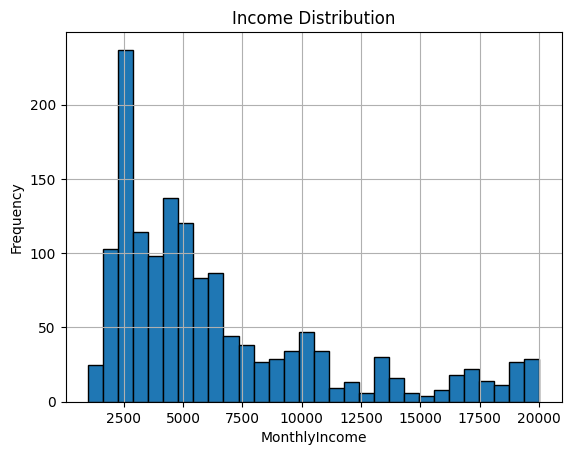

In [79]:
# Plot histogram for Income
data['MonthlyIncome'].hist(bins=30, edgecolor='black')
plt.title('Income Distribution')
plt.xlabel('MonthlyIncome')
plt.ylabel('Frequency')
plt.show()

### Key Insights
The above histogram represents that most of employees have monthly incomes that are around 2500 to 5000 with the peak at 2500, this means that many employees earn near the lower end of the salary range.

The long tail to the right , where the income distribution becomes increasingly sparse, showing that higher incomes are much less frequent.

The distribution appears to be right skewed, suggesting that most employees have lower to middle incomes, while only a small raction earn high salaries.


In [80]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

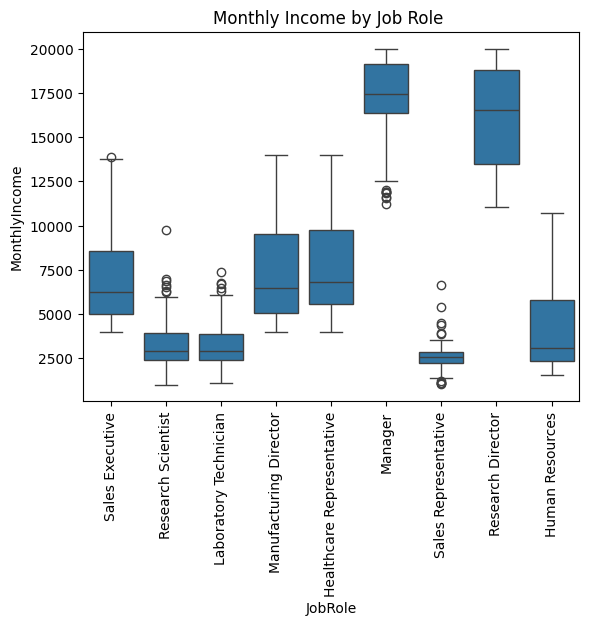

In [81]:
# Plotting of the box plot to visualize distribution of Monthly inomce across Job Roles
sns.boxplot(x='JobRole',y='MonthlyIncome',data=data)
plt.title('Monthly Income by Job Role ')
plt.xlabel('JobRole')
plt.ylabel('MonthlyIncome')
plt.xticks(rotation=90)
plt.show()

### Key Insights

The above boxplot indicates that job roles like Sales Executive and Research Director have higher median incomes, with some employees earns signiicantly higher than others.

There is a presence of outliers in higher income ranges for roles like Manager, Manufacturing Director and Research Director which indicates that few employees in these roles have signiicantly higher than others.

The sales epresentative roles shows signs of a positive skew, with upper whisker extending further than lower, suggesting that majority earn lower salarieswith few high income raising.

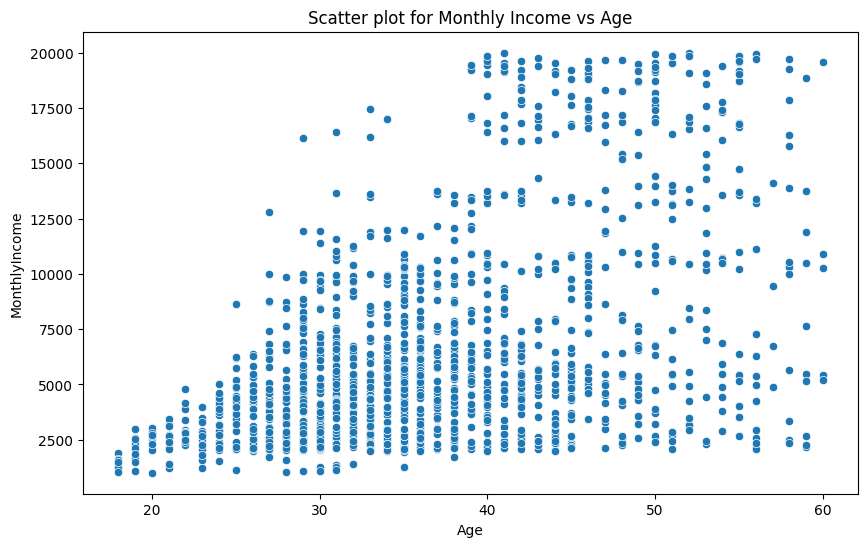

In [82]:
#scatter plot to visualize the relationship between the age and Monthly Income

plt.figure(figsize=(10,6))
sns.scatterplot(x='Age',y='MonthlyIncome',data=data)
plt.title('Scatter plot for Monthly Income vs Age')
plt.xlabel('Age')
plt.ylabel('MonthlyIncome')
plt.show()

### Key Insights

The scatter plot above illustrates that employees that are at the age of less 20 have lower monthly income and the age increases the monthly income slightly increases while there employees that have lower monthly income than others although they are in the same age groups.


In [83]:
#Handling the outliers
z_scores=np.abs(zscore(data.select_dtypes(include=['float64','int64'])))

#setting the threshold
threshold=3

#Create a bolean mask to sieve rows where  Z- score is less thann the threshold
data_no_outliers=data[(z_scores<threshold).all(axis=1)]

#Show data without outliers
data_no_outliers.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [86]:
#Encode all categorical features of my data
le=LabelEncoder()

#identiy columns to encode
categorical_columns=data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    data[col]=le.fit_transform(data[col])

In [87]:
#View the data after encoding
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [93]:
#Define the Features X and Target Y
X=data.drop(columns=['Attrition'])
y=data['Attrition']

#split the data
X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=42)


In [96]:
#Normalize the data 
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [100]:
#Select the model
model=LogisticRegression()
model.fit(X_train_scaled,y_train)

#Model  Training 
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [104]:
# Make predictions
y_prediction=model.predict(X_test_scaled)


In [107]:
#Now Evaluate the model
print('Accuracy :', accuracy_score(y_test, y_prediction))
print('Confusion Matrix: ',confusion_matrix(y_test,y_prediction))
print('Classification Report :',classification_report(y_test,y_prediction))

Accuracy : 0.8843537414965986
Confusion Matrix:  [[244  11]
 [ 23  16]]
Classification Report :               precision    recall  f1-score   support

           0       0.91      0.96      0.93       255
           1       0.59      0.41      0.48        39

    accuracy                           0.88       294
   macro avg       0.75      0.68      0.71       294
weighted avg       0.87      0.88      0.88       294



### Key Insights

The Accuracy score of 0.88 means the model perorms ver well.Meaning it is perorming for class 0 with a high precision, recall and F1 score.However , it struggles to predict class 1, indicated by lower precision, recall and F1 -score for that class. This could suggesst an imbalance in the dataset or that the model neeeds further tuning to handle the minority class better